In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
data = pd.read_csv("Chernobyl_ Chemical_Radiation.csv",header=0)
data = pd.DataFrame(data)
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PAYS            2051 non-null   object 
 1   Code            2051 non-null   int64  
 2   Location        2051 non-null   object 
 3   Longitude       2051 non-null   float64
 4   Latitude        2051 non-null   float64
 5   Date            2051 non-null   object 
 6   I_131_(Bq/m3)   2031 non-null   object 
 7   Cs_134_(Bq/m3)  1897 non-null   object 
 8   Cs_137_(Bq/m3)  1571 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 144.3+ KB


,Code,Longitude,Latitude
count,2051.000000,2051.000000,2051.000000
mean,10.339834,11.960522,47.544885
std,7.497841,11.298828,11.398712
min,1.000000,-6.280000,0.000000
25%,3.000000,5.180000,45.800000
50%,8.000000,9.800000,48.460000
75%,14.000000,14.500000,52.760000
max,24.000000,50.680000,63.830000


<AxesSubplot:>

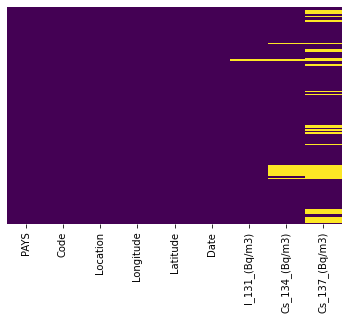

In [52]:
sns.heatmap(data.isnull(), cmap="viridis" , cbar=False, yticklabels=False)

In [53]:
data.drop(['Code'],axis=1,inplace=True)

In [54]:
data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]] = data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]].replace("<",np.NaN)
data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]] = data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]].replace("L",np.NaN)
data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]] = data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]].replace("N",np.NaN)
data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]] = data[["I_131_(Bq/m3)","Cs_134_(Bq/m3)","Cs_137_(Bq/m3)"]].apply(pd.to_numeric)

<AxesSubplot:>

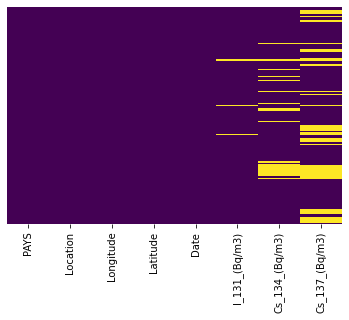

In [55]:
sns.heatmap(data.isnull(), cmap="viridis" , cbar=False, yticklabels=False)

In [56]:
data.sort_values(by=['Date'], inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data

,PAYS,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
0,SE,RISOE,12.07,55.70,1986-04-27,1.000000,0.000000,0.240000
1651,NO,BERGEN,10.66,59.90,1986-04-28,0.000200,0.000000,0.000000
1623,FI,NURMIJAERVI,24.70,60.45,1986-04-28,0.000000,0.950000,1.790000
1659,NO,KJELLER,10.66,59.90,1986-04-28,0.120000,0.000000,0.020000
1200,BE,MOL,5.12,51.18,1986-04-28,0.000000,0.000000,0.000031
...,...,...,...,...,...,...,...,...
1234,BE,MOL,5.12,51.18,1986-05-31,0.000000,NaN,0.000000
1110,UK,GLASGOW,-4.49,56.00,1986-05-31,0.000000,0.017000,0.034000
1869,SE,STOCKHOLM,18.08,59.33,1986-05-31,0.000338,0.000177,0.000324
559,IR,GLASNEVIN.Dublin,-6.28,53.37,1986-06-05,0.000000,0.000000,NaN


In [58]:
index_data = data.copy()
index_data.set_index(["Location","Date"],inplace=True)
index_data

PAYS  Longitude  Latitude  I_131_(Bq/m3)  \
Location         Date                                                  
RISOE            1986-04-27   SE      12.07     55.70       1.000000   
BERGEN           1986-04-28   NO      10.66     59.90       0.000200   
NURMIJAERVI      1986-04-28   FI      24.70     60.45       0.000000   
KJELLER          1986-04-28   NO      10.66     59.90       0.120000   
MOL              1986-04-28   BE       5.12     51.18       0.000000   
...                          ...        ...       ...            ...   
                 1986-05-31   BE       5.12     51.18       0.000000   
GLASGOW          1986-05-31   UK      -4.49     56.00       0.000000   
STOCKHOLM        1986-05-31   SE      18.08     59.33       0.000338   
GLASNEVIN.Dublin 1986-06-05   IR      -6.28     53.37       0.000000   
NORDERNEY        1986-08-04   DE       7.15     53.71       0.000000   

                             Cs_134_(Bq/m3)  Cs_137_(Bq/m3)  
Location         Date                                        
RISOE            1986-04-27        0.000000        0.240000  
BERGEN           1986-04-28        0.000000        0.000000  
NURMIJAERVI      1986-04-28        0.950000        1.790000  
KJELLER          1986-04-28        0.000000        0.020000  
MOL              1986-04-28        0.000000        0.000031  
...                                     ...             ...  
                 1986-05-31             NaN        0.000000  
GLASGOW          1986-05-31        0.017000        0.034000  
STOCKHOLM        1986-05-31        0.000177        0.000324  
GLASNEVIN.Dublin 1986-06-05        0.000000             NaN  
NORDERNEY        1986-08-04        0.000000        0.000070  

[2051 rows x 6 columns]

In [60]:
average_Data = index_data.copy()
average_Data = index_data.groupby(["Location","Date","PAYS"],sort=False).mean()
average_Data

Longitude  Latitude  I_131_(Bq/m3)  \
Location         Date       PAYS                                       
RISOE            1986-04-27 SE        12.07     55.70       1.000000   
BERGEN           1986-04-28 NO        10.66     59.90       0.000200   
NURMIJAERVI      1986-04-28 FI        24.70     60.45       0.000000   
KJELLER          1986-04-28 NO        10.66     59.90       0.120000   
MOL              1986-04-28 BE         5.12     51.18       0.000000   
...                                     ...       ...            ...   
                 1986-05-31 BE         5.12     51.18       0.000000   
GLASGOW          1986-05-31 UK        -4.49     56.00       0.000000   
STOCKHOLM        1986-05-31 SE        18.08     59.33       0.000338   
GLASNEVIN.Dublin 1986-06-05 IR        -6.28     53.37       0.000000   
NORDERNEY        1986-08-04 DE         7.15     53.71       0.000000   

                                  Cs_134_(Bq/m3)  Cs_137_(Bq/m3)  
Location         Date       PAYS                                  
RISOE            1986-04-27 SE          0.000000        0.240000  
BERGEN           1986-04-28 NO          0.000000        0.000000  
NURMIJAERVI      1986-04-28 FI          2.990000        5.030000  
KJELLER          1986-04-28 NO          0.000000        0.020000  
MOL              1986-04-28 BE          0.000000        0.000031  
...                                          ...             ...  
                 1986-05-31 BE               NaN        0.000000  
GLASGOW          1986-05-31 UK          0.017000        0.034000  
STOCKHOLM        1986-05-31 SE          0.000177        0.000324  
GLASNEVIN.Dublin 1986-06-05 IR          0.000000             NaN  
NORDERNEY        1986-08-04 DE          0.000000        0.000070  

[1414 rows x 5 columns]

In [63]:
average_Data = average_Data.interpolate(method="linear",axis=0)

<AxesSubplot:ylabel='Location-Date-PAYS'>

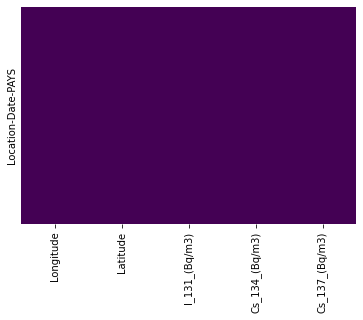

In [65]:
sns.heatmap(average_Data.isnull(), cmap="viridis" , cbar=False, yticklabels=False)

In [66]:
numeric_Data = data.select_dtypes(include=["float32","float64","int32","int64","uint8"])
numeric_Data = numeric_Data.reset_index(drop=True)
numeric_Data

,Longitude,Latitude,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
0,12.07,55.70,1.000000,0.000000,0.240000
1,10.66,59.90,0.000200,0.000000,0.000000
2,24.70,60.45,0.000000,0.950000,1.790000
3,10.66,59.90,0.120000,0.000000,0.020000
4,5.12,51.18,0.000000,0.000000,0.000031
...,...,...,...,...,...
2046,5.12,51.18,0.000000,NaN,0.000000
2047,-4.49,56.00,0.000000,0.017000,0.034000
2048,18.08,59.33,0.000338,0.000177,0.000324
2049,-6.28,53.37,0.000000,0.000000,NaN


In [71]:
inter_Data = data.interpolate(method="ffill",axis=0)
inter_Data = inter_Data.reset_index(drop=True)

<AxesSubplot:>

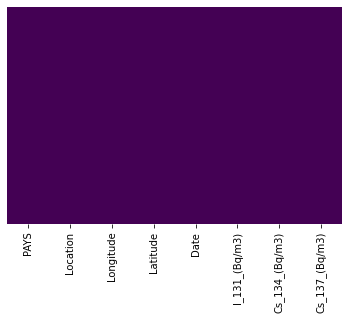

In [72]:
sns.heatmap(inter_Data.isnull(), cmap="viridis" , cbar=False, yticklabels=False)